In [48]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load the dataset
df=pd.read_csv("/content/Invistico_Airline.csv")

In [50]:
# To check first 5 values in the dataset
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
2,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
3,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied
4,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,5,4,5,5,4,2,0,0.0,satisfied


In [51]:
# to check the shape of the dataset
df.shape

(129880, 23)

In [52]:
# To check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [53]:
# To check null values
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [54]:
# fill the missing values
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [55]:
# to check the dataset
sum(df.isnull().sum())

0

In [56]:
df.shape

(129880, 23)

In [57]:
# Encode categorical features
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)


In [58]:
df.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0,0,0,1,1,0,1
1,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0,0,0,1,1,0,1
2,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0,0,0,1,1,0,1
3,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0,0,0,1,1,0,1
4,30,1894,0,0,0,3,2,0,2,2,...,4,2,0,0,1,0,1,1,0,1


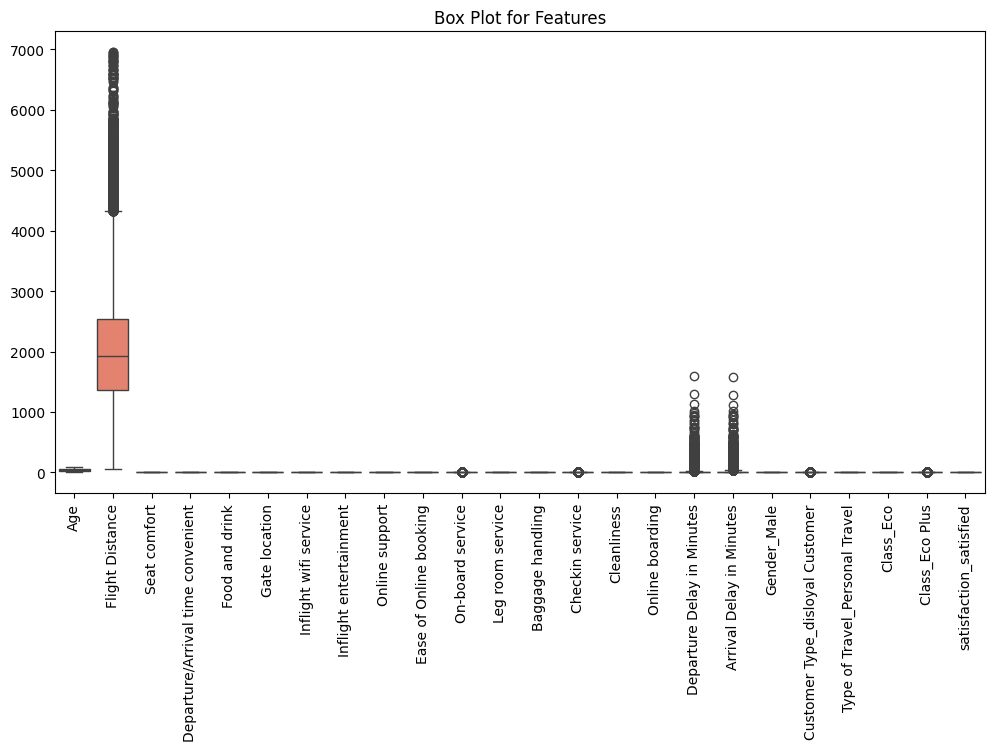

In [59]:
# to check outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate column names
plt.title("Box Plot for Features")
plt.show()

In [60]:
for col in df:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed successfully!")


Outliers removed successfully!


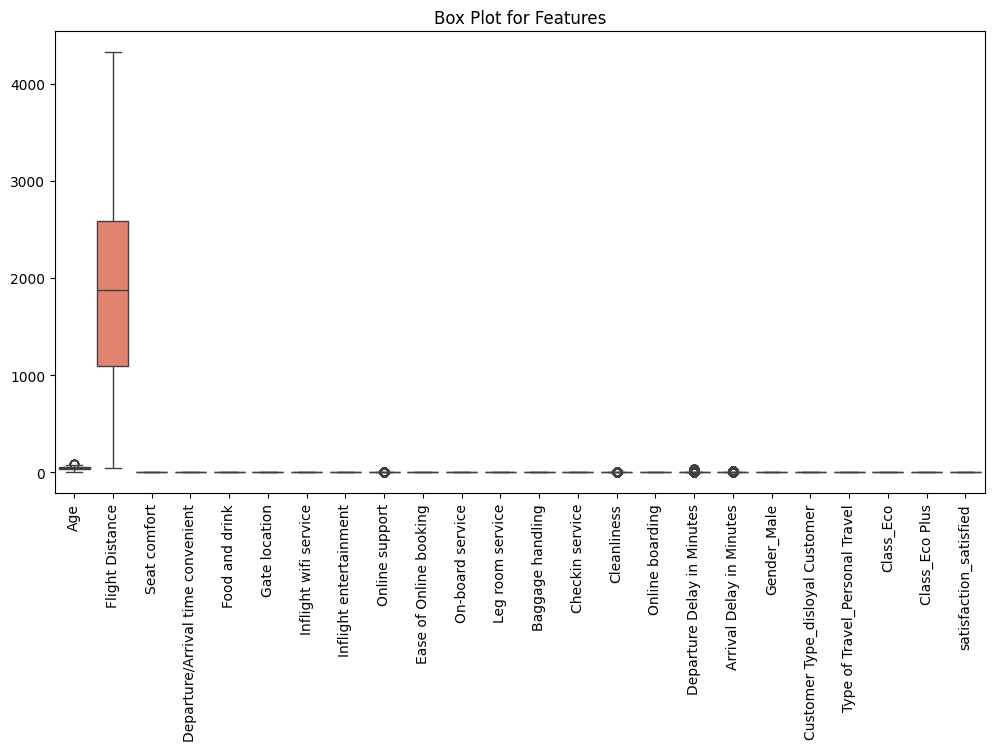

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate column names
plt.title("Box Plot for Features")
plt.show()

In [62]:
# Define features and target
X = df.drop("satisfaction_satisfied", axis=1)
y = df["satisfaction_satisfied"]

In [63]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**LINEAR REGRESSION**

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Train the model
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

# Predict
y_pred_lr=lr.predict(X_test_scaled)

# Evaluate Metrics
mse_lr=mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)
accuracy_lr=r2_lr*100

# Print evaluation metrics
print("\n Linear Regression Metrics:")
print("\n MSE : ",mse_lr)
print("\n MAE : ",mae_lr)
print("\n R2_SCORE : ",r2_lr)
# R² close to 1 → Good fit
# R² close to 0 → Poor fit
print("\n ACCURACY : ",accuracy_lr)


 Linear Regression Metrics:

 MSE :  0.09938496398551573

 MAE :  0.24128547852560459

 R2_SCORE :  0.47436433336046735

 ACCURACY :  47.43643333604673


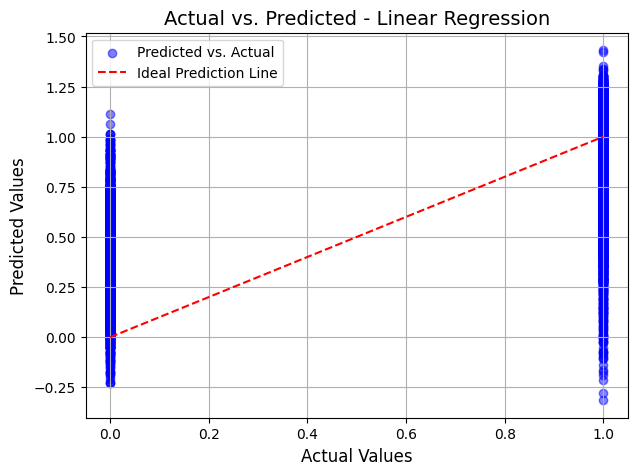

In [66]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Prediction Line")

# Add title, labels, and legend
plt.title("Actual vs. Predicted - Linear Regression", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


**LOGISTIC REGRESSION**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_log = logistic_reg.predict(X_test_scaled)

# Compute Classification Metrics
accuracy_lg = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

# Print Metrics
print("\n Logistic Regression Metrics:")
print("\n Accuracy:", accuracy_lg)
print("\n Precision:", precision)
print("\n Recall:", recall)
print("\n F1 Score:", f1)



 Logistic Regression Metrics:

 Accuracy: 0.8743470149253731

 Precision: 0.9023564954682779

 Recall: 0.932675493379965

 F1 Score: 0.9172655242306984


In [68]:

# Detailed Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred_log))




 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74      2714
           1       0.90      0.93      0.92      8006

    accuracy                           0.87     10720
   macro avg       0.84      0.82      0.83     10720
weighted avg       0.87      0.87      0.87     10720



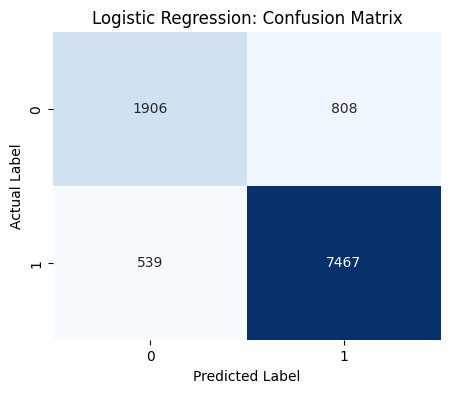

In [69]:

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

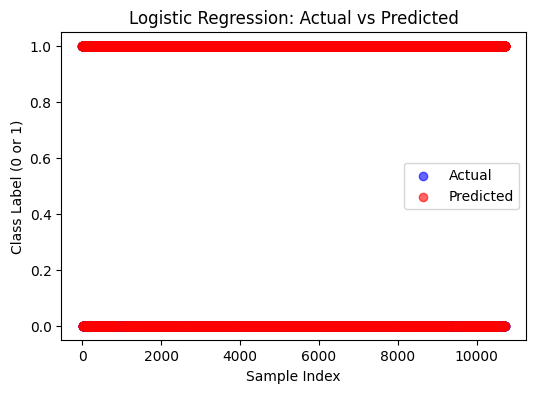

In [70]:

# Plot Predicted vs Actual Values
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6, color="blue")
plt.scatter(range(len(y_pred_log)), y_pred_log, label="Predicted", alpha=0.6, color="red")
plt.title("Logistic Regression: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Class Label (0 or 1)")
plt.legend()
plt.show()

**DECISION TREE**

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt_clf.predict(X_test_scaled)

# Compute Classification Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# Print Metrics
print("\n DECISION TREE Metrics:")
print("\n Accuracy:", accuracy_dt)
print("\n Precision:", precision)
print("\n Recall:", recall)
print("\n F1 Score:", f1)


 DECISION TREE Metrics:

 Accuracy: 0.9530783582089553

 Precision: 0.9688788901387326

 Recall: 0.9682737946540095

 F1 Score: 0.9685762478915474


In [72]:
# Detailed Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred_dt))


 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2714
           1       0.97      0.97      0.97      8006

    accuracy                           0.95     10720
   macro avg       0.94      0.94      0.94     10720
weighted avg       0.95      0.95      0.95     10720



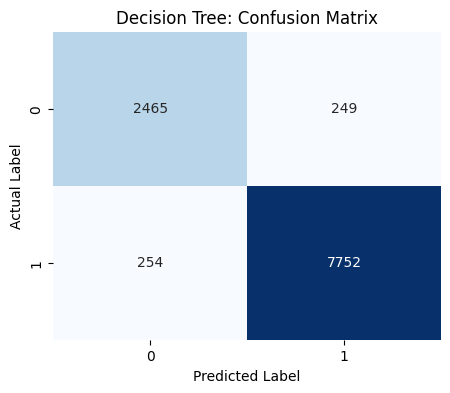

In [73]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

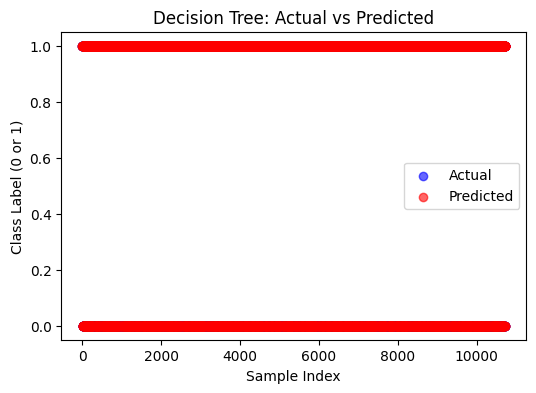

In [74]:
#  Plot Predicted vs Actual Values
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6, color="blue")
plt.scatter(range(len(y_pred_dt)), y_pred_dt, label="Predicted", alpha=0.6, color="red")
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Class Label (0 or 1)")
plt.legend()
plt.show()


**SVM**

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train model
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_clf.predict(X_test_scaled)

# Compute Classification Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print Metrics
print("\n SVM Metrics:")
print("\n Accuracy:", accuracy_svm)
print("\n Precision:", precision)
print("\n Recall:", recall)
print("\n F1 Score:", f1)


 SVM Metrics:

 Accuracy: 0.9574626865671642

 Precision: 0.9683622828784119

 Recall: 0.9748938296277792

 F1 Score: 0.9716170795468692


In [76]:
# Detailed Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred_svm))



 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2714
           1       0.97      0.97      0.97      8006

    accuracy                           0.96     10720
   macro avg       0.95      0.94      0.94     10720
weighted avg       0.96      0.96      0.96     10720



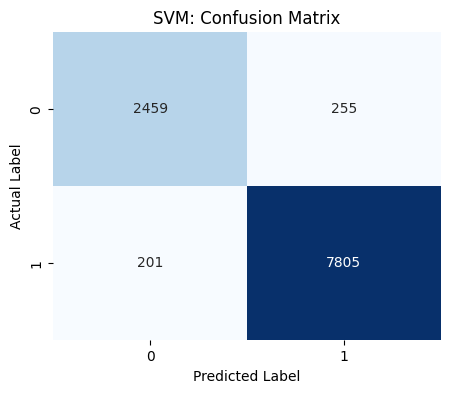

In [77]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()



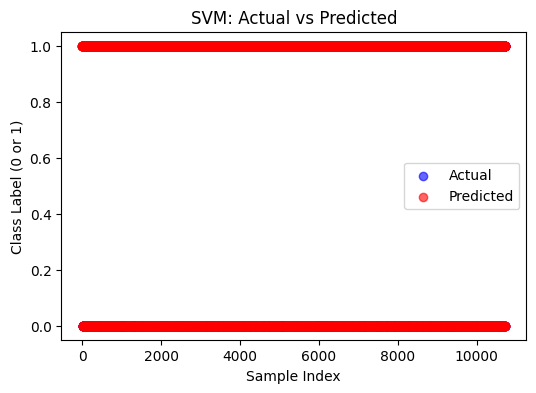

In [78]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6, color="blue")
plt.scatter(range(len(y_pred_svm)), y_pred_svm, label="Predicted", alpha=0.6, color="red")
plt.title("SVM: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Class Label (0 or 1)")
plt.legend()
plt.show()

**RANDOM FOREST**

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test_scaled)

# Compute Classification Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print Metrics
print("\n Random Forest Metrics:")
print("\n Accuracy:", accuracy_rf)
print("\n Precision:", precision)
print("\n Recall:", recall)
print("\n F1 Score:", f1)


 Random Forest Metrics:

 Accuracy: 0.9666044776119403

 Precision: 0.9776417686734948

 Recall: 0.9776417686734948

 F1 Score: 0.9776417686734948


In [80]:
# Detailed Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))


🌲 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2714
           1       0.98      0.98      0.98      8006

    accuracy                           0.97     10720
   macro avg       0.96      0.96      0.96     10720
weighted avg       0.97      0.97      0.97     10720



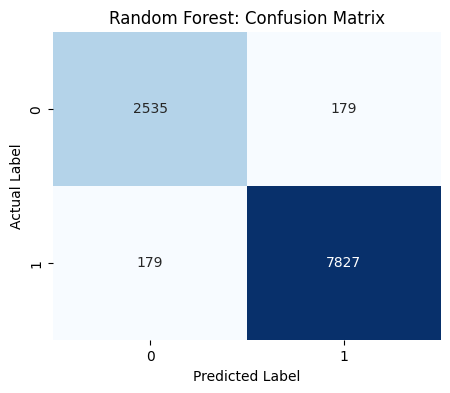

In [81]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

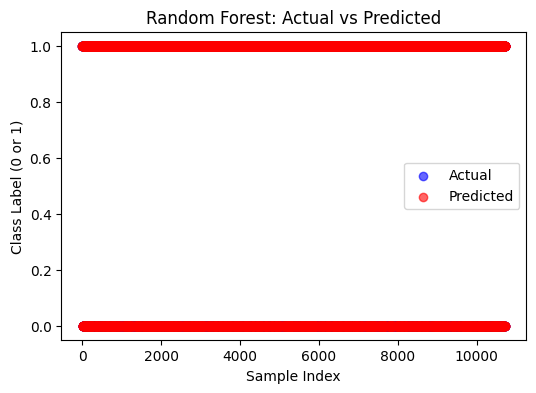

In [82]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6, color="blue")
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label="Predicted", alpha=0.6, color="red")
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Class Label (0 or 1)")
plt.legend()
plt.show()

In [85]:
print(accuracy_lr)
print(accuracy_lg*100)
print(accuracy_dt*100)
print(accuracy_svm*100)
print(accuracy_rf*100)

47.43643333604673
87.43470149253731
95.30783582089552
95.74626865671641
96.66044776119404


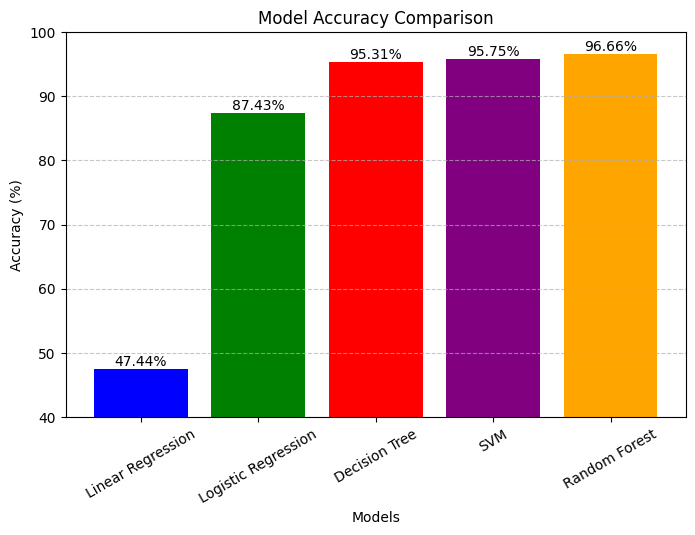

In [86]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracy values
models = ["Linear Regression", "Logistic Regression", "Decision Tree", "SVM", "Random Forest"]
accuracies = [47.4364, 87.4347, 95.3078, 95.7462, 96.6604]

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(40, 100)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=10)

plt.show()
